## STEPS TAKE IN THE PROJECT



1. First, several libraries are imported, including pandas, sklearn, matplotlib, and seaborn. These libraries will be used throughout the code for tasks such as data manipulation, model fitting, and visualization.

2. The file data_banknote_authentication.txt is read into a Pandas dataframe, and the column names are changed to "variance", "skewness", "kurtosis", "entropy", and "class". The data is then saved to the file again with the updated column names.

3. Some basic information about the data is displayed, including the first few rows, the data types of the columns, and some summary statistics.

4. The data is visualized using histograms and density plots.

5. The data is checked for null values, and a boxplot is generated to identify any outliers.

6. The Pearson correlation coefficient between the different features is calculated and visualized using a heatmap.

7. The data is normalized using RobustScaler and PowerTransformer.

8. The data is split into training and testing sets using train_test_split.

9. A dictionary of different machine learning models is created, including LogisticRegression, KNeighborsClassifier, SVC, RandomForestClassifier, GradientBoostingClassifier, and XGBClassifier.

10. A function called model is defined, which fits each of the models to the training data, makes predictions on the test data, and prints out various evaluation metrics such as accuracy, AUC, and a classification report. The function also generates a confusion matrix to visualize the model's performance.

11. A function called estimator is defined, which loops through the models in the estimators dictionary and calls the model function on each one, passing in the training and testing data as arguments.

12. The estimator function is called, which fits and evaluates each of the models on the banknote authentication data.

13. The performance of the models is compared using a variety of evaluation metrics, including accuracy, auc, precision, recall, and f1-score.

## IN SUMMARY

The code in this notebook does the analysis of a dataset of banknote authentication data. It begins by generating histograms and a boxplot of the data using seaborn and matplotlib, respectively. It also computes the pairwise correlations between the features using the corr function from pandas and visualizes the correlations using a heatmap generated with seaborn.

The code is trying to get the data ready for analysis. It starts by changing the scale of two features called 'variance' and 'skewness' so that they are not affected by any unusual or extreme values that might be present. Then, it changes the shape of the distribution of two other features called 'kurtosis' and 'entropy' so that they are more evenly spread out and easier for the computer to understand. All of these changes are being made to help predict the data more accurately.

After preprocessing the data, the code splits it into training and test sets using the train_test_split function from scikit-learn. It then defines a dictionary of scikit-learn classifiers to be evaluated and a function that fits each classifier to the training data, makes predictions on the test data, and displays the resulting accuracy, AUC, classification report, and confusion matrix. Finally, it calls the function to evaluate each classifier on the test data. The results of the evaluation are printed to the console.

In [120]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import sklearn.metrics as metric
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
file_path = 'data_banknote_authentication.txt'
df = pd.read_csv(file_path, index_col =False)
column_names = ["variance", "skewness", "kurtosis", "entropy", "class"]
df.columns = column_names
df.to_csv(file_path, index = None)

In [122]:
df.head()

,variance,skewness,kurtosis,entropy,class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1371 non-null   float64
 1   skewness  1371 non-null   float64
 2   kurtosis  1371 non-null   float64
 3   entropy   1371 non-null   float64
 4   class     1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [124]:
df.describe()

,variance,skewness,kurtosis,entropy,class
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [125]:
df.isnull().sum()

variance    0
skewness    0
kurtosis    0
entropy     0
class       0
dtype: int64

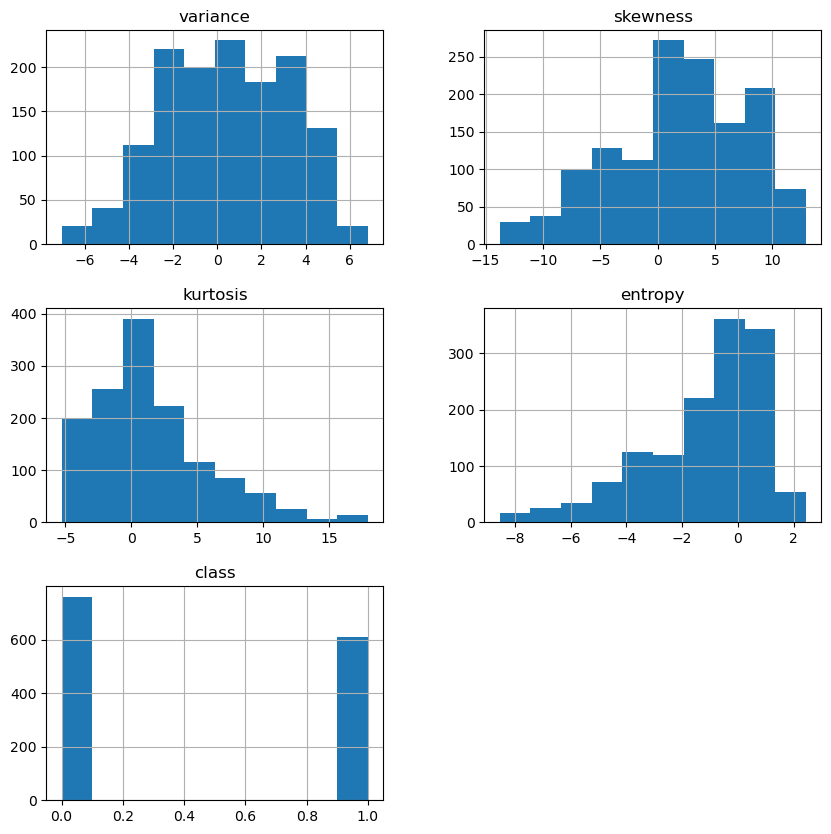

In [126]:
df.hist(figsize=(10, 10))
plt.show()

C:\Users\isrea\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


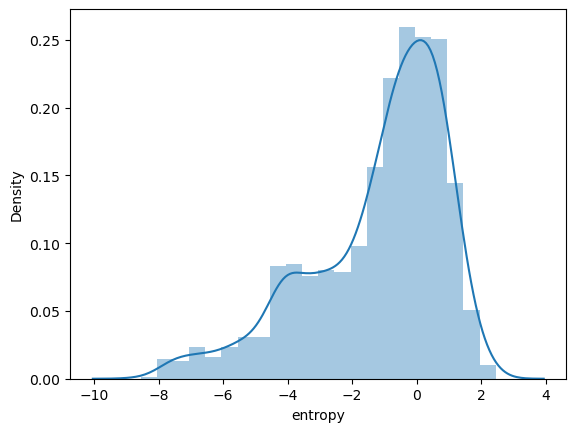

In [127]:
sns.distplot(df["entropy"])
plt.show()

C:\Users\isrea\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


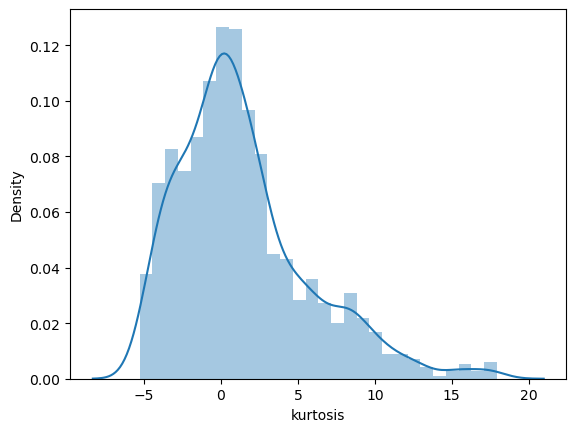

In [128]:
sns.distplot(df["kurtosis"])
plt.show()

In [129]:
df['class'].value_counts()

0    761
1    610
Name: class, dtype: int64

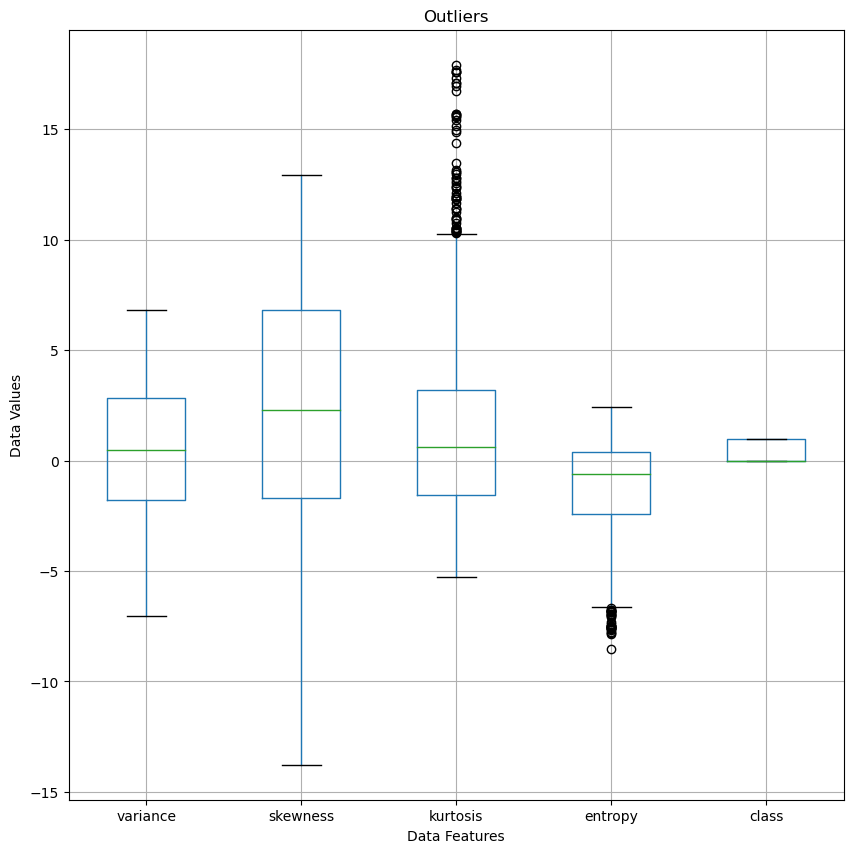

In [130]:
plot_ax = df.boxplot(figsize=(10,10))
plot_ax.set_ylabel("Data Values")
plot_ax.set_xlabel("Data Features")
plot_ax.set_title("Outliers")
plt.show()

In [131]:
#would have to handle outliers some how???

In [132]:
df.corr(method='pearson')
#checking for correlation

,variance,skewness,kurtosis,entropy,class
variance,1.000000,0.263333,-0.380358,0.276666,-0.724655
skewness,0.263333,1.000000,-0.786729,-0.526896,-0.444281
kurtosis,-0.380358,-0.786729,1.000000,0.319219,0.155346
entropy,0.276666,-0.526896,0.319219,1.000000,-0.023200
class,-0.724655,-0.444281,0.155346,-0.023200,1.000000


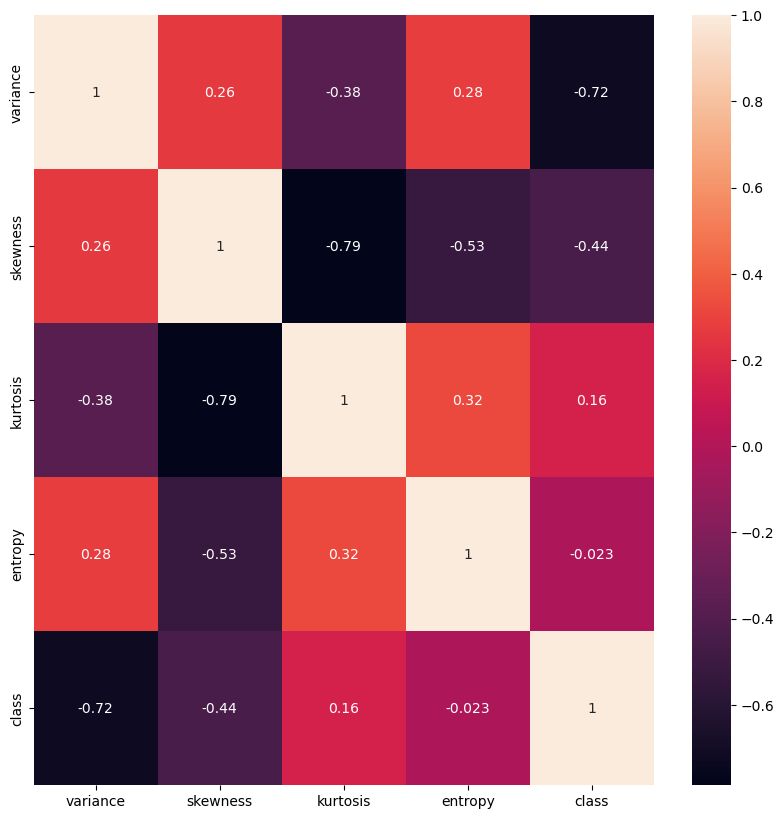

In [133]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='pearson'), annot=True)
plt.show()

In [134]:
#normalizing data treat data according to EDA outliers
scaler = RobustScaler()
log = PowerTransformer()

df_std = pd.DataFrame(scaler.fit_transform(df[['variance', 'skewness']]))
df_log = pd.DataFrame(log.fit_transform(df[['kurtosis','entropy']]))

df_std.index = df_log.index
df_log.index = df_log.index

In [135]:
df_clean = df

In [136]:
df_clean[['variance', 'skewness']] = df_std
df_clean[['kurtosis','entropy']] = df_log

In [137]:
df_clean.isnull().sum()

variance    0
skewness    0
kurtosis    0
entropy     0
class       0
dtype: int64

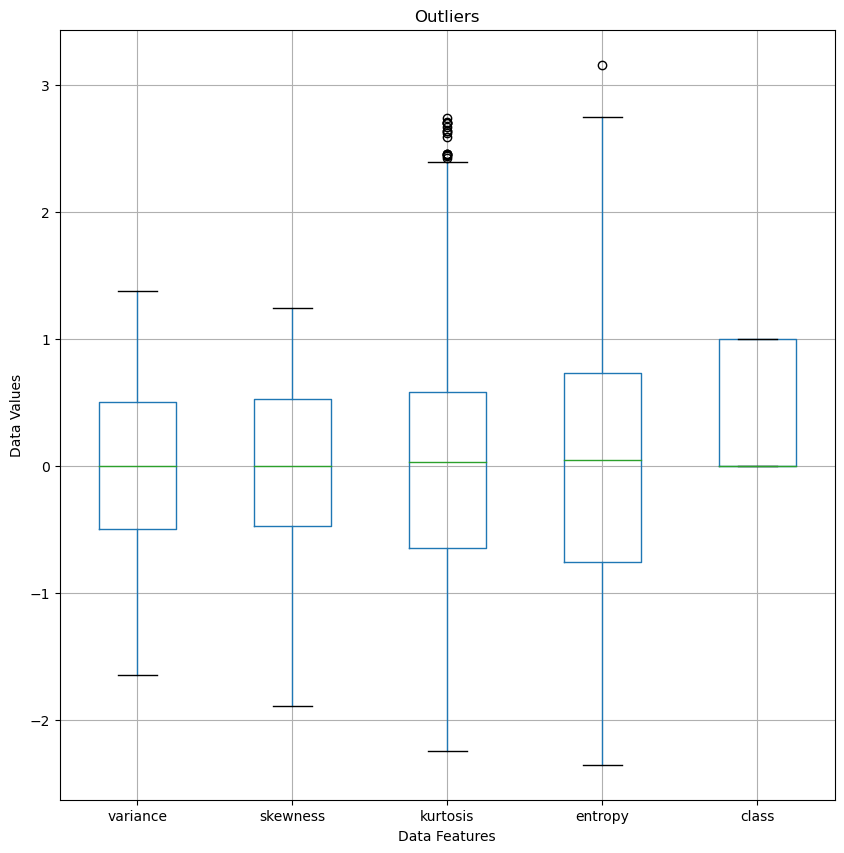

In [138]:
plot_ax = df_clean.boxplot(figsize=(10,10))
plot_ax.set_ylabel("Data Values")
plot_ax.set_xlabel("Data Features")
plot_ax.set_title("Outliers")
plt.show()

In [139]:
#spliting data into X and Y
X = df_clean.drop("class", axis=1)
Y = df["class"]
print(f" X shape {X.shape} , Y shape {Y.shape}")

 X shape (1371, 4) , Y shape (1371,)


In [140]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [141]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1096, 4), (275, 4), (1096,), (275,))

In [142]:
#using different models to try out on the data
estimators = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=3),
    'SVM': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGB': xgb.XGBClassifier()
}

In [143]:
def model(estimator, x_train, x_test, y_train, y_test):
    clf = estimator.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'The accuracy score is: {accuracy * 100}')
    print(f"AUC {roc_auc_score(y_test, y_pred)}")
    print(f'The report is: {classification_report(y_test, y_pred)}')
   


    plot_confusion_matrix(clf, x_test, y_test)
    plt.show()

    print('-'*80)

In [144]:
#looping through the models and making prediction one at a time
def estimator(x_train, x_test, y_train, y_test):
    for name, estimator in estimators.items():
        print(name)
        model(estimator, x_train, x_test, y_train, y_test)

LogisticRegression
The accuracy score is: 99.63636363636364
AUC 0.9967320261437909
The report is:               precision    recall  f1-score   support

           0       1.00      0.99      1.00       153
           1       0.99      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



C:\Users\isrea\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


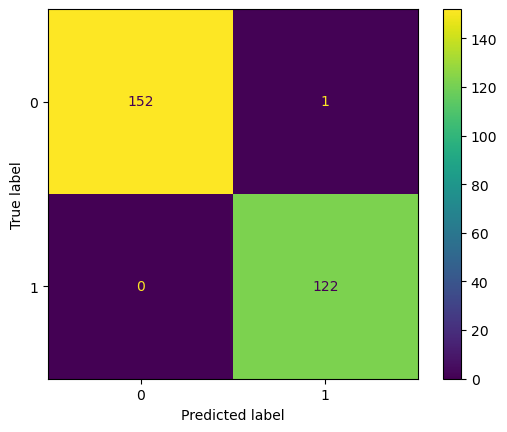

--------------------------------------------------------------------------------
KNeighborsClassifier
The accuracy score is: 100.0
AUC 1.0
The report is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



C:\Users\isrea\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\isrea\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\isrea\anaconda3\lib\site-packages\sklearn\neighbors\_classification.p

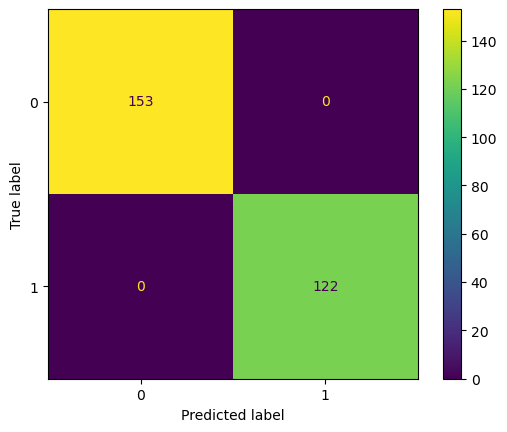

C:\Users\isrea\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


--------------------------------------------------------------------------------
SVM
The accuracy score is: 100.0
AUC 1.0
The report is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



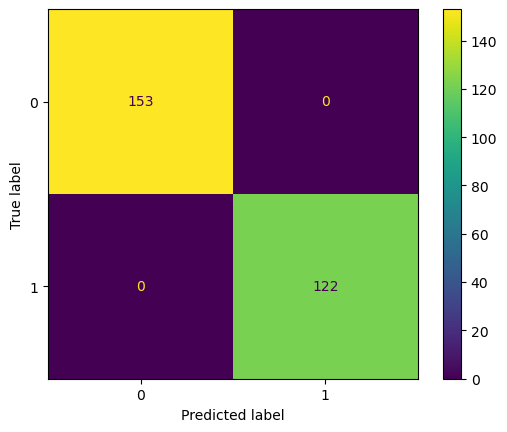

--------------------------------------------------------------------------------
RandomForestClassifier
The accuracy score is: 99.63636363636364
AUC 0.9967320261437909
The report is:               precision    recall  f1-score   support

           0       1.00      0.99      1.00       153
           1       0.99      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



C:\Users\isrea\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


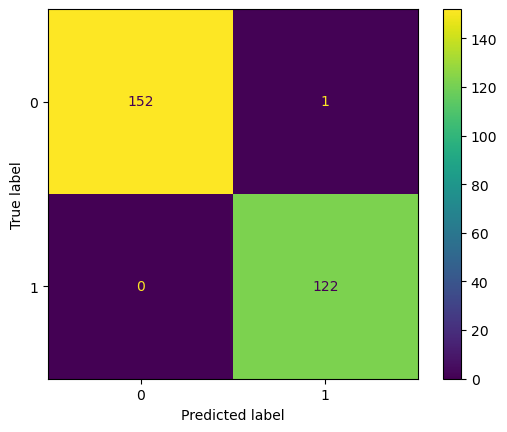

--------------------------------------------------------------------------------
GradientBoostingClassifier
The accuracy score is: 100.0
AUC 1.0
The report is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



C:\Users\isrea\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


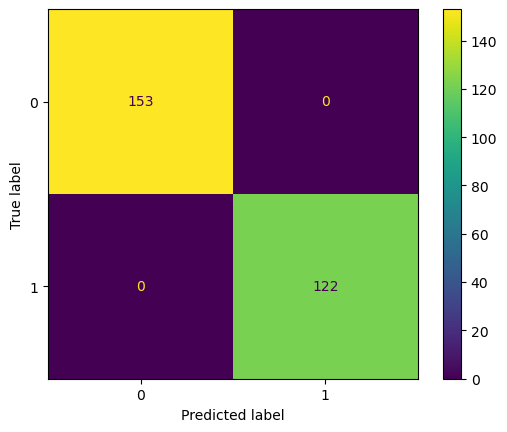

--------------------------------------------------------------------------------
XGB
The accuracy score is: 99.63636363636364
AUC 0.9959016393442623
The report is:               precision    recall  f1-score   support

           0       0.99      1.00      1.00       153
           1       1.00      0.99      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



C:\Users\isrea\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


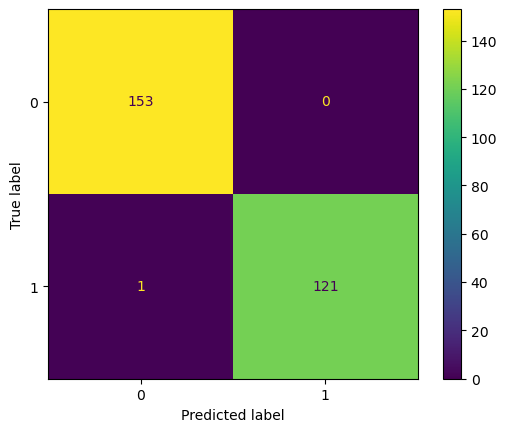

--------------------------------------------------------------------------------


In [145]:
estimator(x_train, x_test, y_train, y_test)

In [146]:
#attempting to use stacking

In [147]:
# Set up the base models
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
knn = KNeighborsClassifier()
svm = SVC()
xgb = xgb.XGBClassifier()

# Set up the stacking classifier
stacking_clf = StackingClassifier(estimators=[('lr', lr), ('rf', rf), ('gb', gb), ('knn', knn), ('svm', svm), ('xgb', xgb)])

# Fit the stacking classifier to the data
stacking_clf.fit(x_train, y_train)

# Make predictions with the stacking classifier
y_pred = stacking_clf.predict(x_val)

# Get the classification report
report = classification_report(y_val, y_pred)
print(report)

# Get the ROC-AUC score
roc_auc = roc_auc_score(y_val, y_pred)
print(f"The ROC-AUC score is: {roc_auc}")

accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy score is: {accuracy * 100}')
print(f"AUC {roc_auc_score(y_test, y_pred)}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

The ROC-AUC score is: 1.0
The accuracy score is: 100.0
AUC 1.0


C:\Users\isrea\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


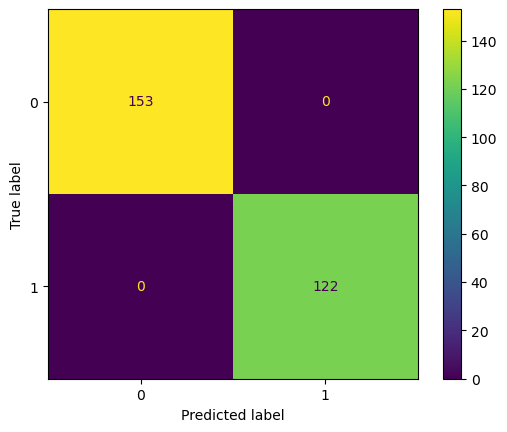

In [148]:
plot_confusion_matrix(stacking_clf, x_test, y_test)